In [121]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import nc_time_axis
import cftime

ds_piC = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/ts/gn/files/d20200828/*').isel(time=slice(0,360))
ds_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/ts/gn/files/d20191031/*')
ds_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/ts/gn/files/d20191113/*')
ds_G1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Amon/ts/gn/files/d20190916/*')
ds_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/ts/gn/files/d20190507/*')

In [122]:
def global_mean(ds):
    lat = ds['lat']
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

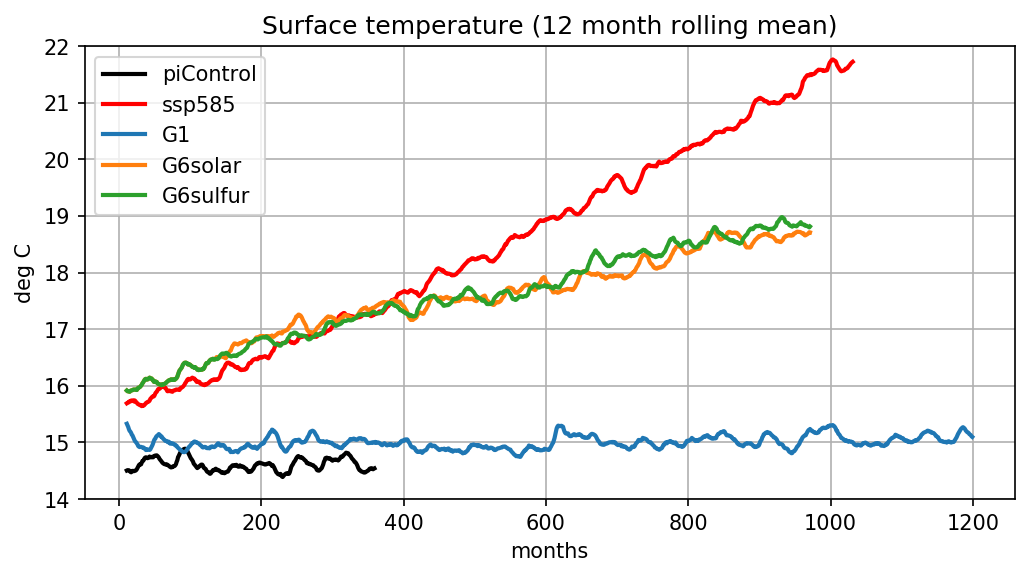

In [123]:
plt.figure(figsize=(8, 4),dpi=150)
plt.plot((global_mean(ds_piC).ts-273).rolling(time=12).mean().values,lw=2,label='piControl',c='k')
plt.plot((global_mean(ds_585).ts-273).rolling(time=12).mean().values,lw=2,label='ssp585',c='r')
plt.plot((global_mean(ds_G1).ts-273).rolling(time=12).mean().values,lw=2,label='G1')
plt.plot((global_mean(ds_solar).ts-273).rolling(time=12).mean().values,lw=2,label='G6solar')
plt.plot((global_mean(ds_sulfur).ts-273).rolling(time=12).mean().values,lw=2,label='G6sulfur')
plt.grid()
plt.ylim([14,22])
plt.ylabel('deg C')
plt.xlabel('months')
plt.legend()
plt.title('Surface temperature (12 month rolling mean)')
plt.show()

In [124]:
ta_piC = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/ta/gn/files/d20200828/*').isel(time=slice(852,972))
ta_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/ta/gn/files/d20191031/*').isel(time=slice(852,972))
ta_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/ta/gn/files/d20191113/*').isel(time=slice(852,972))
ta_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/ta/gn/files/d20190507/*').isel(time=slice(852,972))

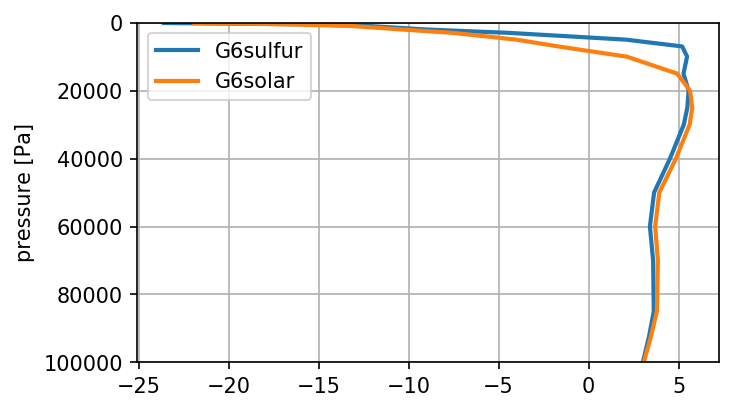

In [125]:
plt.figure(figsize=(5, 3),dpi=150)
(ta_sulfur.ta.mean('time')-ta_piC.ta.mean('time')).where(ta_piC.lat>-30).where(ta_piC.lat<30).mean(('lat','lon')).plot(y='plev',lw=2,label='G6sulfur')
(ta_solar.ta.mean('time')-ta_piC.ta.mean('time')).where(ta_piC.lat>-30).where(ta_piC.lat<30).mean(('lat','lon')).plot(y='plev',lw=2,label='G6solar')
plt.ylim([100000,0])
plt.legend()
plt.grid()
plt.show()

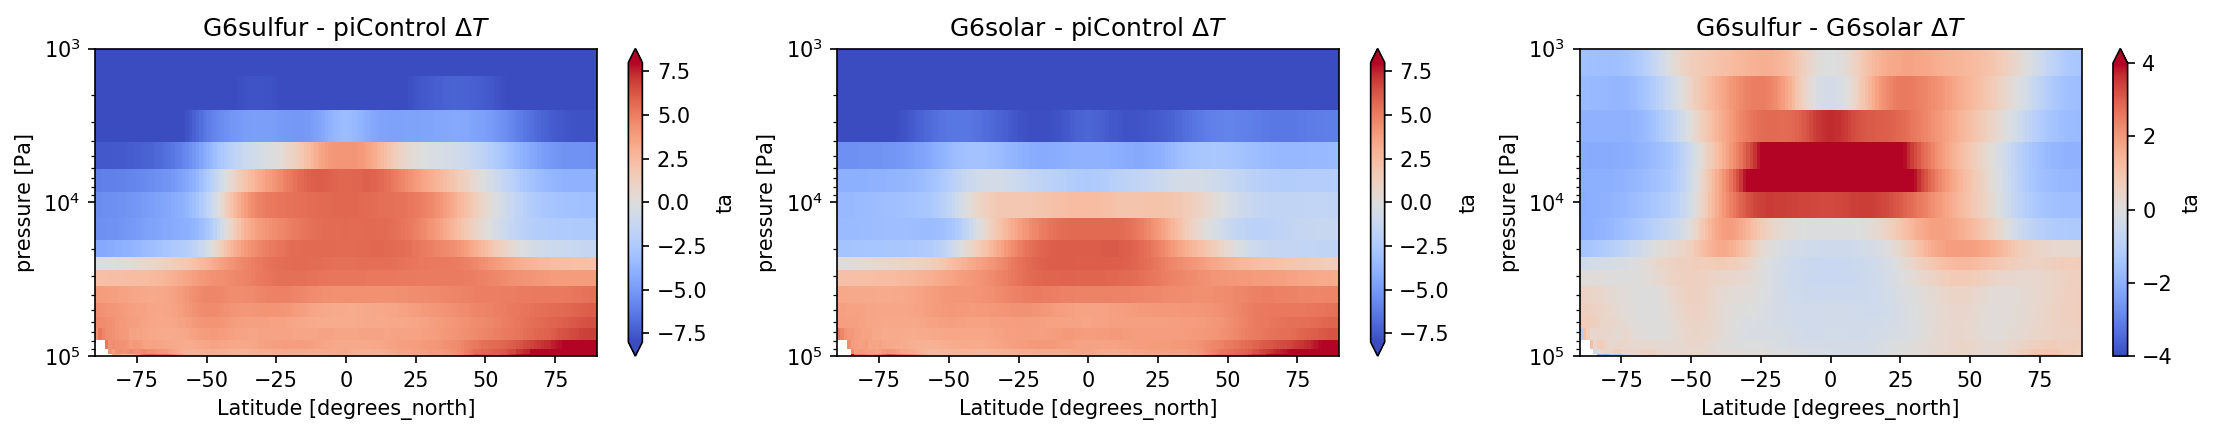

In [126]:
plt.figure(figsize=(15, 3),dpi=150)
plt.subplot(131)
(ta_sulfur.ta.mean('time')-ta_piC.ta.mean('time')).mean(('lon')).plot(vmin=-8,vmax=8,cmap='coolwarm')
plt.ylim([100000,1000])
plt.yscale('log')
plt.title('G6sulfur - piControl $\Delta T$')
plt.subplot(132)
(ta_solar.ta.mean('time')-ta_piC.ta.mean('time')).mean(('lon')).plot(vmin=-8,vmax=8,cmap='coolwarm')
plt.ylim([100000,1000])
plt.yscale('log')
plt.title('G6solar - piControl $\Delta T$')
plt.subplot(133)
(ta_sulfur.ta.mean('time')-ta_solar.ta.mean('time')).mean(('lon')).plot(vmin=-4,vmax=4,cmap='coolwarm')
plt.ylim([100000,1000])
plt.yscale('log')
plt.title('G6sulfur - G6solar $\Delta T$')
plt.tight_layout()
plt.show()

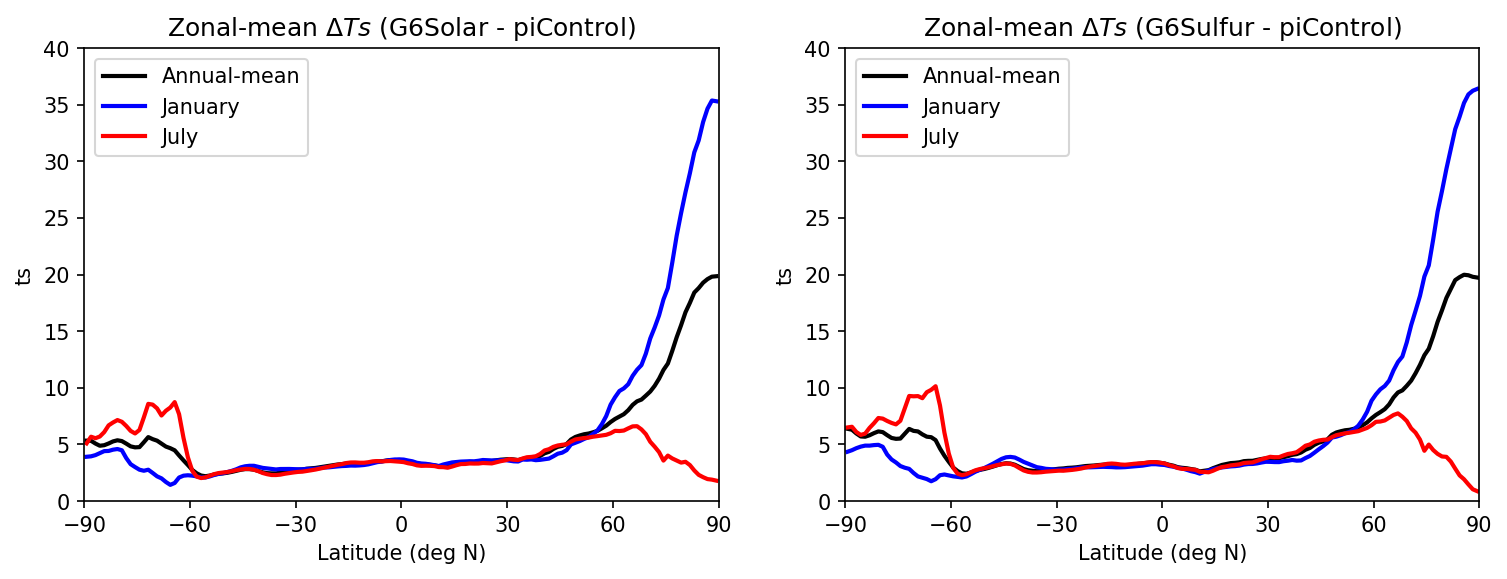

In [137]:
plt.figure(figsize=(12, 4),dpi=150)
plt.subplot(121)
(ds_solar.ts.isel(time=slice(852,972)).mean('time')- \
 ds_piC.ts.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(ds_solar.ts.isel(time=slice(852,972)).isel(time=np.linspace(0,108,10).astype(int)).mean('time')- \
 ds_piC.ts.isel(time=np.linspace(0,108,10).astype(int)).mean('time')).mean('lon').plot(lw=2,label='January',c='b')
(ds_solar.ts.isel(time=slice(852,972)).isel(time=np.linspace(5,113,10).astype(int)).mean('time')- \
 ds_piC.ts.isel(time=np.linspace(5,113,10).astype(int)).mean('time')).mean('lon').plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,40])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean $\Delta Ts$ (G6Solar - piControl)')

plt.subplot(122)
(ds_sulfur.ts.isel(time=slice(852,972)).mean('time')- \
 ds_piC.ts.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(ds_sulfur.ts.isel(time=slice(852,972)).isel(time=np.linspace(0,108,10).astype(int)).mean('time')- \
 ds_piC.ts.isel(time=np.linspace(0,108,10).astype(int)).mean('time')).mean('lon').plot(lw=2,label='January',c='b')
(ds_sulfur.ts.isel(time=slice(852,972)).isel(time=np.linspace(5,113,10).astype(int)).mean('time')- \
 ds_piC.ts.isel(time=np.linspace(5,113,10).astype(int)).mean('time')).mean('lon').plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([0,40])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean $\Delta Ts$ (G6Sulfur - piControl)')
plt.show()

In [138]:
pr_piC = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/pr/gn/files/d20200828/*').isel(time=slice(852,972))
pr_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/pr/gn/files/d20191031/*').isel(time=slice(852,972))
pr_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/pr/gn/files/d20191113/*').isel(time=slice(852,972))
pr_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/pr/gn/files/d20190507/*').isel(time=slice(852,972))

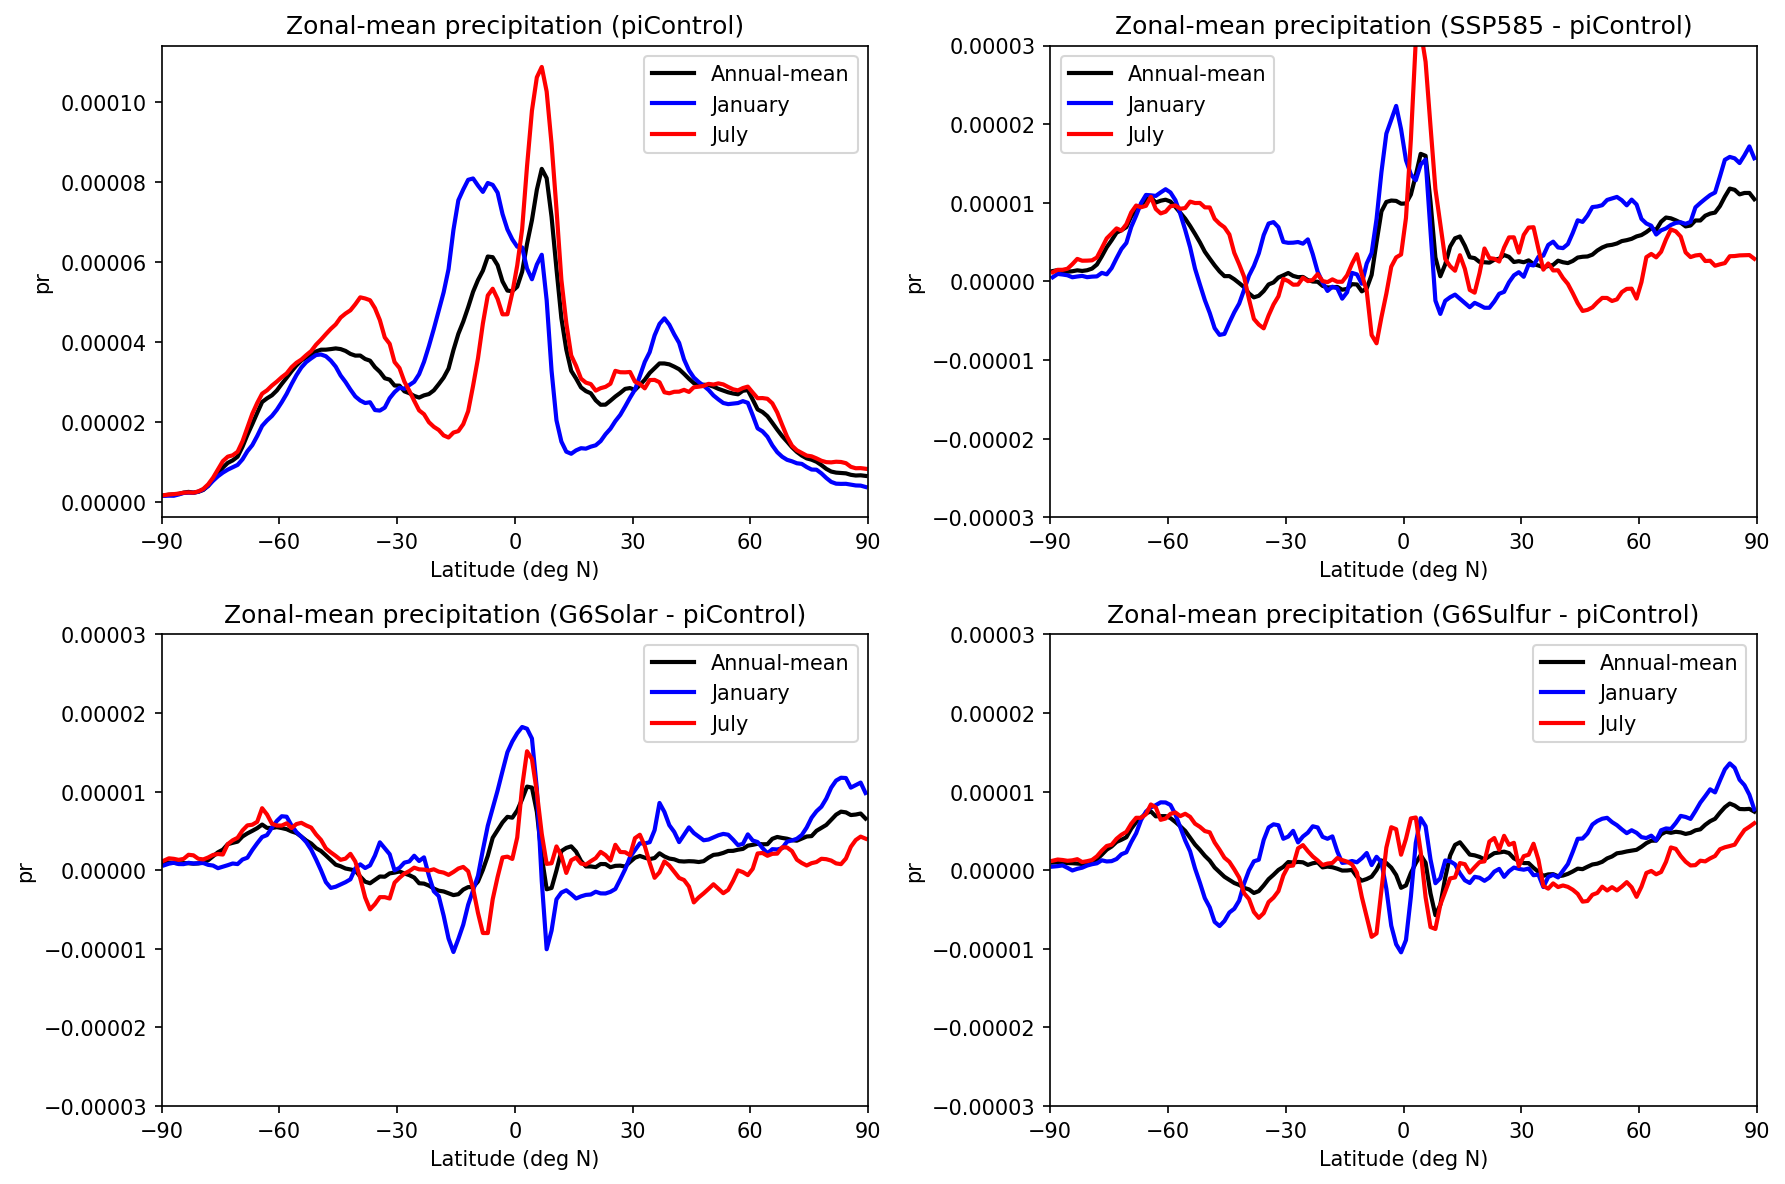

In [153]:
plt.figure(figsize=(12, 8),dpi=150)
plt.subplot(221)
pr_piC.pr.mean('time').mean('lon').plot(lw=2,label='Annual-mean',c='k')
pr_piC.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon').plot(lw=2,label='January',c='b')
pr_piC.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon').plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
# plt.ylim([0,40])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean precipitation (piControl)')

plt.subplot(222)
(pr_585.pr.mean('time') - pr_piC.pr.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(pr_585.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='January',c='b')
(pr_585.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3e-5,3e-5])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean precipitation (SSP585 - piControl)')

plt.subplot(223)
(pr_solar.pr.mean('time') - pr_piC.pr.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(pr_solar.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='January',c='b')
(pr_solar.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3e-5,3e-5])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean precipitation (G6Solar - piControl)')

plt.subplot(224)
(pr_sulfur.pr.mean('time') - pr_piC.pr.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(pr_sulfur.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='January',c='b')
(pr_sulfur.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')-pr_piC.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3e-5,3e-5])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean precipitation (G6Sulfur - piControl)')
plt.tight_layout()
plt.show()

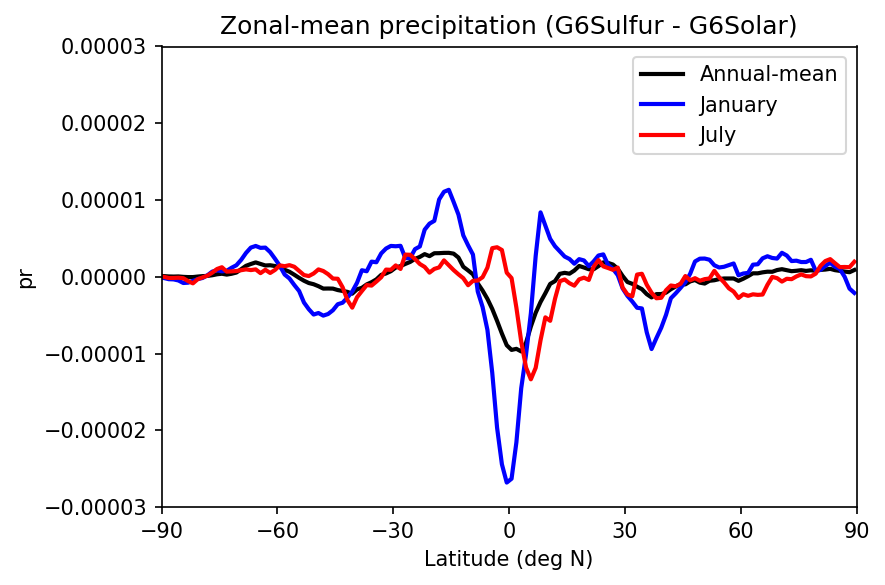

In [154]:
plt.figure(figsize=(6, 4),dpi=150)
(pr_sulfur.pr.mean('time') - pr_solar.pr.mean('time')).mean('lon').plot(lw=2,label='Annual-mean',c='k')
(pr_sulfur.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')-pr_solar.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='January',c='b')
(pr_sulfur.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')-pr_solar.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time').mean('lon')).plot(lw=2,label='July',c='r')
plt.legend()
plt.xticks(np.linspace(-90,90,7))
plt.xlim([-90,90])
plt.ylim([-3e-5,3e-5])
plt.xlabel('Latitude (deg N)')
plt.title('Zonal-mean precipitation (G6Sulfur - G6Solar)')
plt.tight_layout()
plt.show()

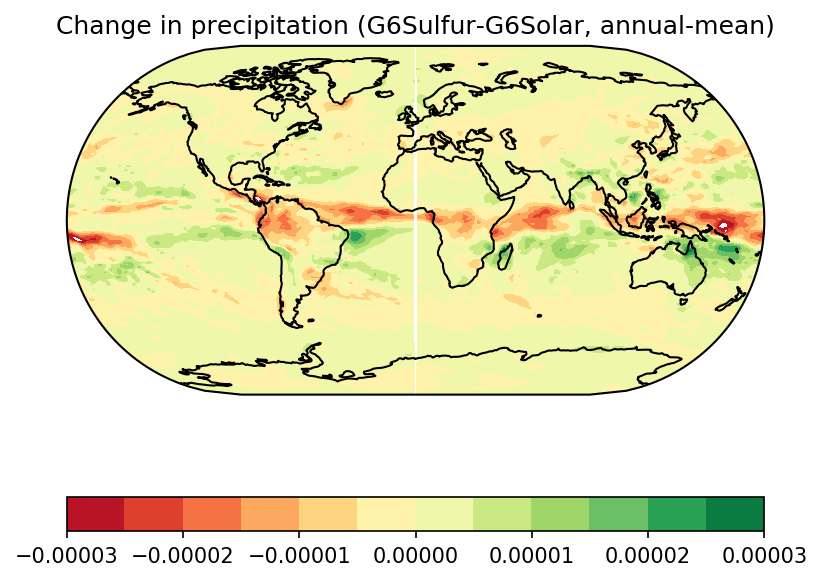

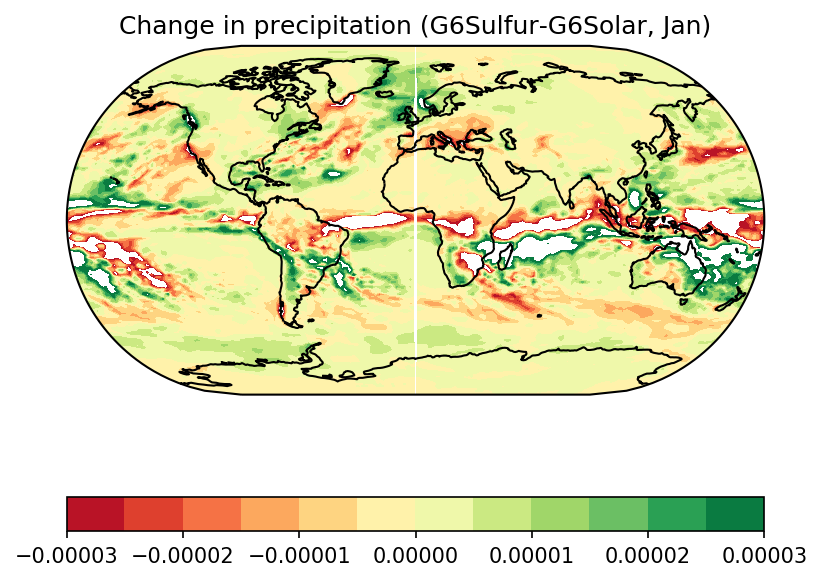

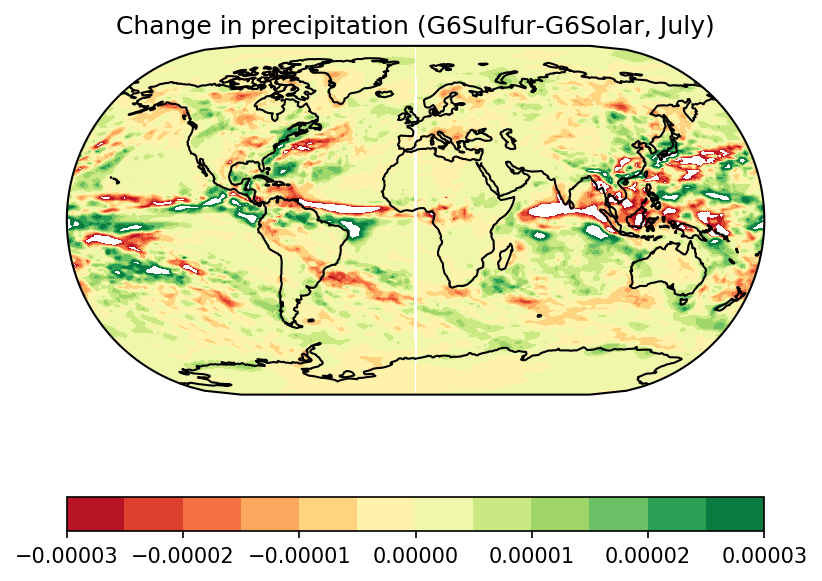

In [178]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(pr_sulfur.lon, pr_sulfur.lat, (pr_sulfur.pr.mean('time') - pr_solar.pr.mean('time')),
                transform=ccrs.PlateCarree(), levels=np.linspace(-3e-5, 3e-5, 13),
                cmap='RdYlGn')

fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
plt.title('Change in precipitation (G6Sulfur-G6Solar, annual-mean)')
plt.show()

fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(pr_sulfur.lon, pr_sulfur.lat, (pr_sulfur.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time') - pr_solar.pr.isel(time=np.linspace(0,108,10).astype(int)).mean('time')),
                transform=ccrs.PlateCarree(), levels=np.linspace(-3e-5, 3e-5, 13),
                cmap='RdYlGn')

fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
plt.title('Change in precipitation (G6Sulfur-G6Solar, Jan)')
plt.show()

fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(pr_sulfur.lon, pr_sulfur.lat, (pr_sulfur.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time') - pr_solar.pr.isel(time=np.linspace(5,113,10).astype(int)).mean('time')),
                transform=ccrs.PlateCarree(), levels=np.linspace(-3e-5, 3e-5, 13),
                cmap='RdYlGn')

fig.colorbar(filled_c, orientation='horizontal')
ax.coastlines()
ax.set_global()
plt.title('Change in precipitation (G6Sulfur-G6Solar, July)')
plt.show()